In [1]:
%matplotlib qt

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing

### ISSUE #1

In [91]:
with open("MC3/MC3.json", "r", encoding="utf8") as f:
    data = json.load(f)

# Create a NetworkX graph
G = nx.MultiGraph()

# Add nodes to the graph
for i, node in enumerate(data['nodes']):
    node_id = node['id'][0]
    country = node['country'][0]
    #product_services = node["product_services"][0]
    #revenue_omu = node["revenue_omu"][0]
    G.add_node(node_id, ntype=node["type"][0])

    
# Add edges to the graph
for edge in data['links']:
    source = edge['source'][0]
    target = edge['target'][0]
    G.add_edge(source,target)

In [92]:
G.number_of_edges(), G.number_of_nodes()

(24038, 51375)

In [93]:
nx.number_connected_components(G)

27384

#### another way to load file using only links info

In [4]:
edges2 = list(map(lambda x: (x["source"][0], x["target"][0]), data["links"]))

In [5]:
G = nx.MultiGraph(edges2)

In [6]:
G.number_of_edges(), G.number_of_nodes()

(24038, 34062)

In [7]:
nx.number_connected_components(G)

10071

In [8]:
nx.draw_circular(G)

#### Para ver que hay nodos duplicados

In [48]:
def safe_convert(x):
    try:
        return x[0]
    except:
        return x

In [49]:
df = pd.DataFrame(data["nodes"])

df.id = df.id.apply(lambda x:x[0])
df.country = df.country.apply(lambda x:x[0])
df.product_services = df.product_services.apply(safe_convert)
df.revenue_omu = df.revenue_omu.apply(safe_convert)
df.type = df.type.apply(lambda x:x[0])

In [50]:
nodes = df.id.values.tolist()

In [68]:
len(nodes), len(set(nodes))#counting without duplicate

(27622, 22929)

In [64]:
df1 = pd.DataFrame(data["links"])

df1.source = df1.source.apply(lambda x: x[0])
df1.target = df1.target.apply(lambda x: x[0])
df1.type = df1.type.apply(lambda x: x[0])

In [65]:
##all nodes from source and target
nodes_edges = df1.source.values.tolist() + df1.target.values.tolist()

In [66]:
len(nodes_edges), len(set(nodes_edges))#counting without duplicate

(48076, 34062)

In [69]:
#how many nodes defined by links are not in the nodes section
count = 0
for i in set(nodes_edges):
    if i not in nodes:
        count+=1

In [79]:
"#nodes defined by the links specified in the nodes section:{}".format(len(set(nodes_edges)) - count)

'#nodes defined by the links specified in the nodes section:5616'

In [80]:
"#nodes defined by the links not specified in the nodes section:{}".format(count)

'#nodes defined by the links not specified in the nodes section:28446'

In [83]:
count = 0
for j in set(nodes):
    if j in nodes_edges:
        count+=1

In [84]:
count

5616

In [85]:
"#nodes that are in the links section.:{}".format(count)

'#nodes that are in the links section.:5616'

In [89]:
"#nodes that are not in the links section.:{}".format(len(set(nodes))-count)

'#nodes that are not in the links section.:17313'

### ISSUE #2

In [115]:
fnodes = nodes[nodes.id=="Miller Group"]

In [116]:
fnodes

,country,id,product_services,revenue_omu,type
853,[ZH],Miller Group,[Pool and spa parts distributor; Pool accessor...,[105666.6728],[Company]
2103,[ZH],Miller Group,[Staplers; ink pads; correction tapes; stamps;...,[27897.2705],[Company]
9783,[ZH],Miller Group,[],NaN,[Beneficial Owner]
9970,[ZH],Miller Group,[],NaN,[Beneficial Owner]
12710,[ZH],Miller Group,[],NaN,[Beneficial Owner]
14462,[ZH],Miller Group,[],NaN,[Beneficial Owner]
15315,[ZH],Miller Group,[],NaN,[Beneficial Owner]
15371,[ZH],Miller Group,[],NaN,[Beneficial Owner]
16488,[ZH],Miller Group,[],NaN,[Beneficial Owner]
16727,[ZH],Miller Group,[],NaN,[Beneficial Owner]


In [113]:
fedges = edges[(edges.source=="Miller Group") | (edges.target=="Miller Group")]

In [125]:
fedges

,source,target,type
2539,Miller Group,Steven Austin,[Company Contacts]
6217,Miller Group,Melanie Williamson,[Beneficial Owner]
8976,Miller Group,Laura Williams,[Beneficial Owner]
16966,Miller Group,Jason Welch,[Beneficial Owner]
20529,Miller Group,Kaitlyn Hurst,[Beneficial Owner]
22111,Miller Group,Louis Harmon,[Company Contacts]


In [148]:
G = nx.MultiGraph()

for i, node in enumerate(fnodes.values):
    node_id = node[1]
    G.add_node(node_id, serial=i, revenue=node[3], type1=node[4])

for edge in fedges.values:
    source = edge[0]
    target = edge[1]
    G.add_edge(source,target)

In [149]:
%matplotlib inline

In [150]:
G.number_of_edges(), G.number_of_nodes()

(6, 7)

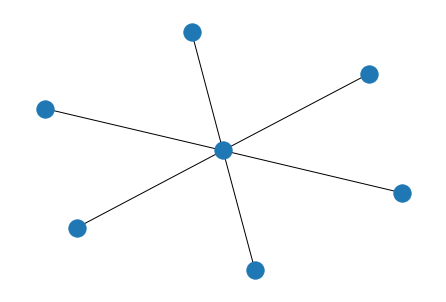

In [151]:
nx.draw(G)

In [152]:
G.nodes.data()

NodeDataView({'Miller Group': {'serial': 15, 'revenue': nan, 'type1': ['Company Contacts']}, 'Steven Austin': {}, 'Melanie Williamson': {}, 'Laura Williams': {}, 'Jason Welch': {}, 'Kaitlyn Hurst': {}, 'Louis Harmon': {}})